In [7]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [11]:
raw_data = pd.read_csv('stroopdata.csv')
raw_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [27]:
raw_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [29]:
mean_congruent = np.mean(raw_data.Congruent)
mean_incongruent = np.mean(raw_data.Incongruent)

sdev_congruent = np.std(raw_data.Congruent, ddof=1)
sdev_incongruent = np.std(raw_data.Incongruent, ddof=1)

print ("Congruent mean: %.4f, std_dev: %.4f" %(mean_congruent, sdev_congruent))
print ("Incongruent mean: %.4f, std_dev: %.4f" %(mean_incongruent, sdev_incongruent))

Congruent mean: 14.0511, std_dev: 3.5594
Incongruent mean: 22.0159, std_dev: 4.7971


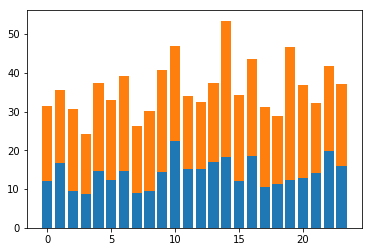

In [37]:
x_axis = range(0, raw_data.shape[0])
plt.bar(x_axis, raw_data.Congruent)
plt.bar(x_axis, raw_data.Incongruent, bottom = raw_data.Congruent)
plt.show()

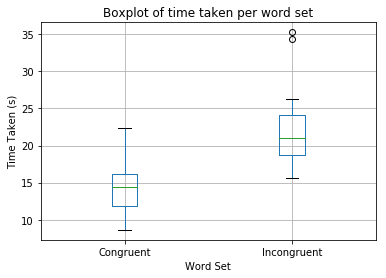

In [39]:
raw_data.boxplot()
plt.xlabel("Word Set")
plt.ylabel("Time Taken (s)")
plt.title('Boxplot of time taken per word set')
plt.show()

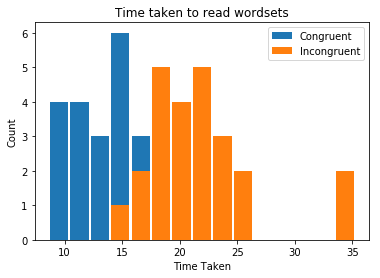

In [52]:
raw_data.plot.hist( bins=15, rwidth=0.9)
plt.title('Time taken to read wordsets')
plt.xlabel('Time Taken')
plt.ylabel('Count')

In [65]:
num_samples = raw_data.shape[0]

diff = np.subtract(raw_data.Congruent, raw_data.Incongruent)
diff_mean = np.mean(diff)
diff_sdev = np.std(diff, ddof=1)
diff_sr = diff_sdev / np.sqrt(num_samples)

t = diff_mean / diff_sdev

c = stats.t.ppf(0.975, num_samples-1)

p = stats.t.sf(np.abs(t), num_samples-1)*2
p_lower = diff_mean + (c * diff_sr)
p_upper = diff_mean - (c * diff_sr)

print("Mean Diff: %.4f" % diff_mean)
print("T value: %.4f" % t)
print("Critical Value (0.05): %.4f" % c)
print("P value: %.4f" % p)
print("Confidence: %.4f <-> %.4f" % (p_lower, p_upper))

Mean Difference: -7.9648
T value: -1.6372
Critical Value (0.05): 2.0687
P value: 0.1152
Confidence: -5.9106 <-> -10.0190
